In [51]:
%pip install --upgrade pip --index-url https://pypi.org/simple -q
%pip install -r requirements.txt --index-url https://pypi.org/simple -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", mpl.__version__)
print("Seaborn version:", sns.__version__)

NumPy version: 1.24.3
Pandas version: 1.4.4
Matplotlib version: 3.7.2
Seaborn version: 0.12.2


In [53]:
# Set display options
pd.set_option('display.max_columns', None)  # Ensures all columns are displayed
#pd.set_option('display.max_rows', None)  # Optional: Display all rows as well

file_path = '../resources/sample_input.csv'
df = pd.read_csv(file_path)
print(df.head())

   car_ID         CarName          ownername                   owneremail  \
0       1  toyota corolla  Matthew Hernandez  matthew.hernandez@gmail.com   
1       2   toyota carina      Megan Sanchez      megan.sanchez@gmail.com   
2       3  toyota corolla     Sarah Lawrence      sarahlawrence@gmail.com   
3       4   toyota corona       Debra Juarez     debra.juarez@hotmail.com   
4       5     nissan otti     Michael Harvey      michaelharvey@gmail.com   

                                   dealershipaddress    saledate  \
0  96559 Moore Street\r\nPenningtonchester, NJ 99785  2016-11-23   
1  18399 House Village Apt. 697\r\nLake Amberburg...  2020-08-11   
2            79775 Anne Way\r\nEast Ashley, GU 04171  2018-06-26   
3             540 Allen Lane\r\nLake Randy, ME 90623  2018-07-24   
4  5519 Krause Station Apt. 935\r\nWest Frederick...  2022-02-10   

                     iban fueltype aspiration doornumber    carbody  \
0  GB84TJXJ3114**********   diesel        std       four 

In [54]:
now = datetime.now()

df['saledate'] = pd.to_datetime(df['saledate'])
df['car_age_days'] = (now - df['saledate']).dt.days
df['car_age'] = df['car_age_days'] / 365.25
df.drop('car_age_days', axis=1, inplace=True)

/Users/Daniel_Ritter/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


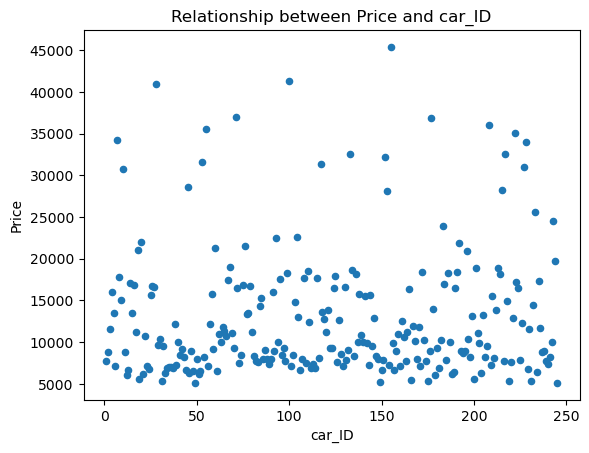

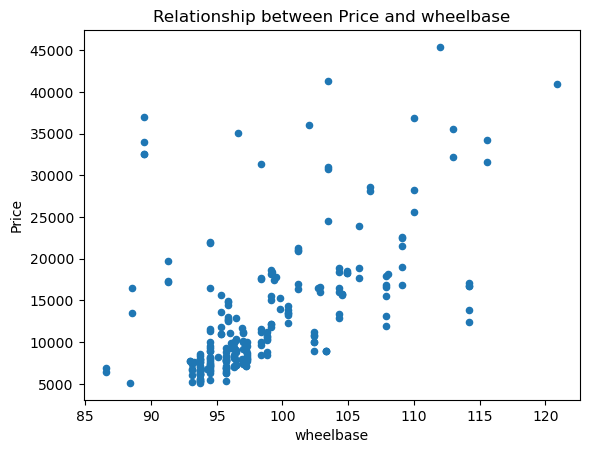

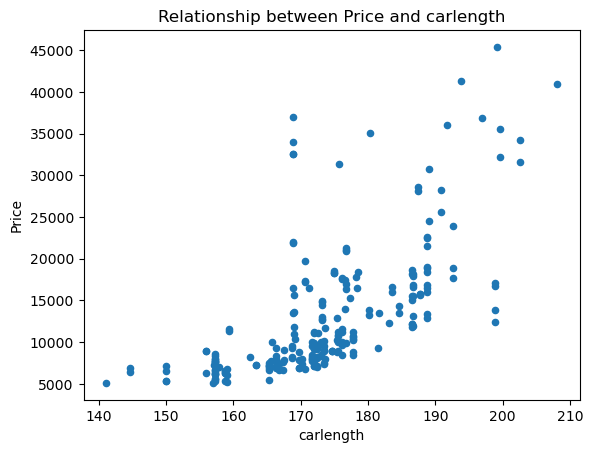

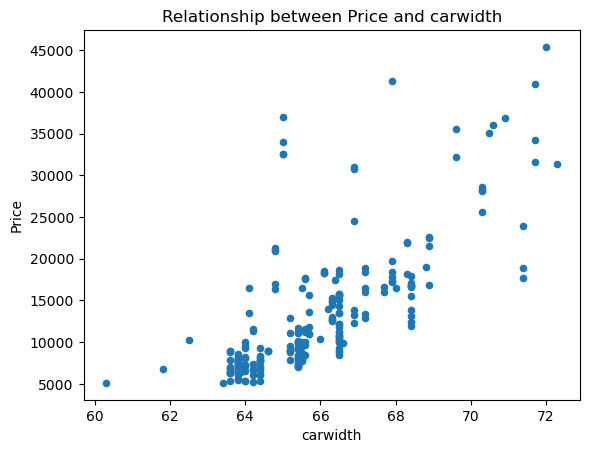

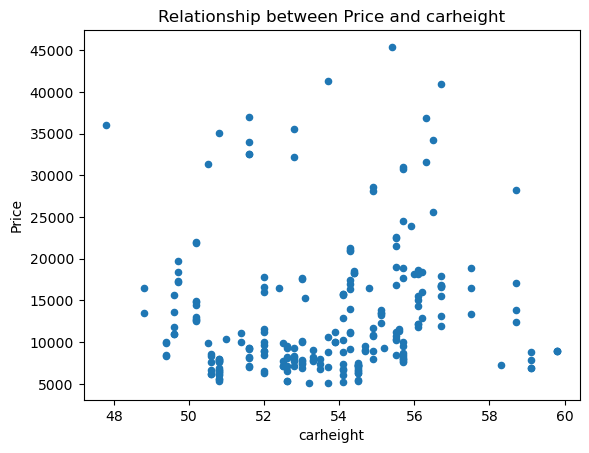

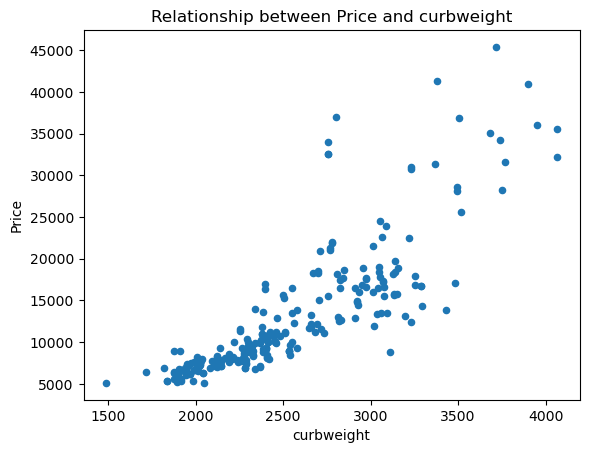

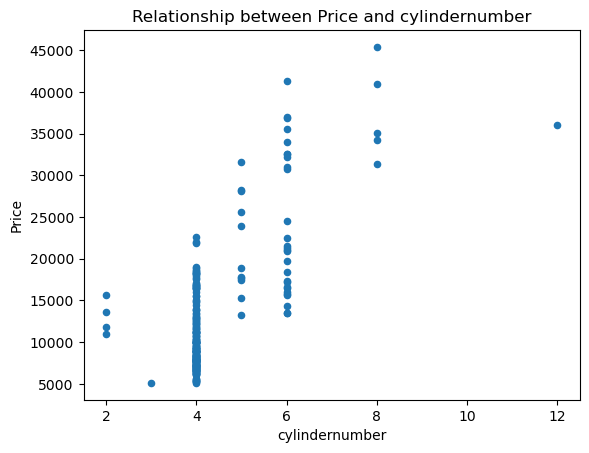

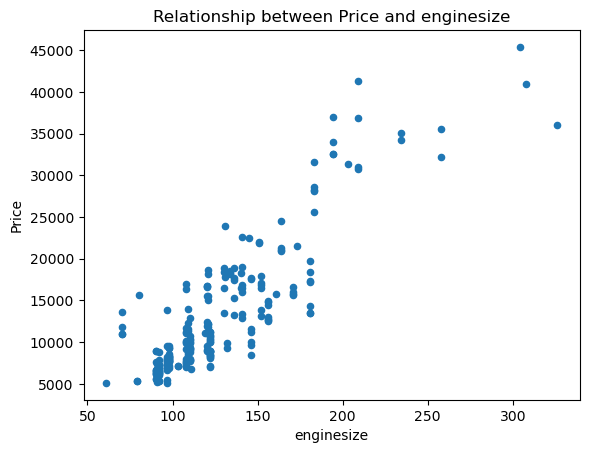

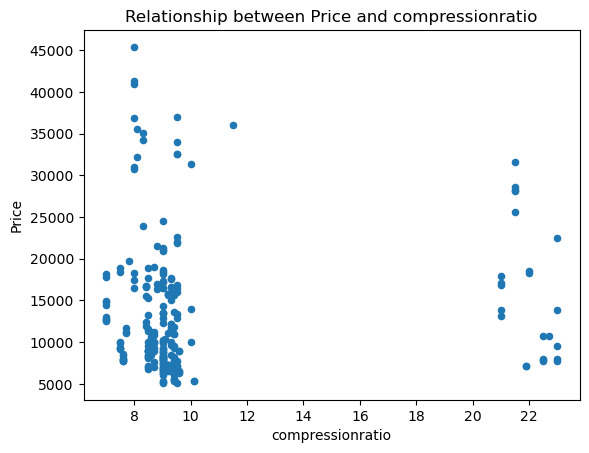

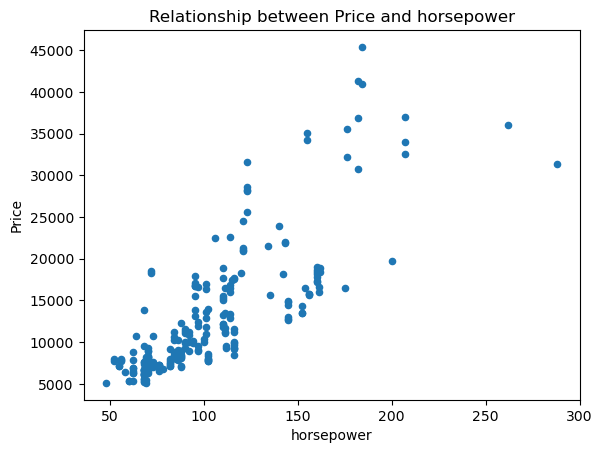

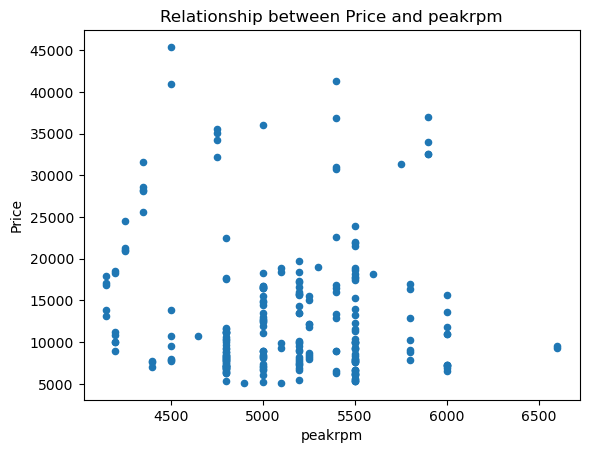

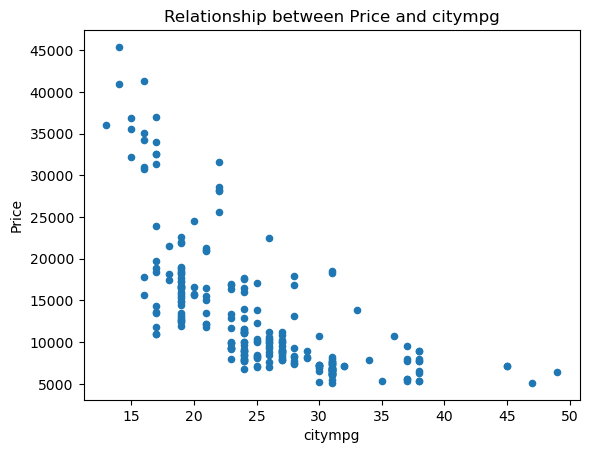

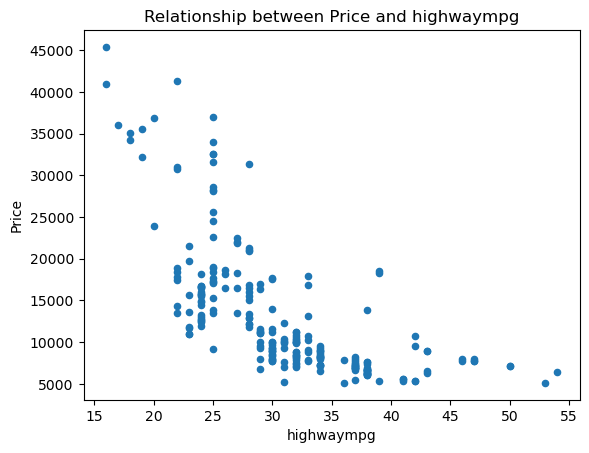

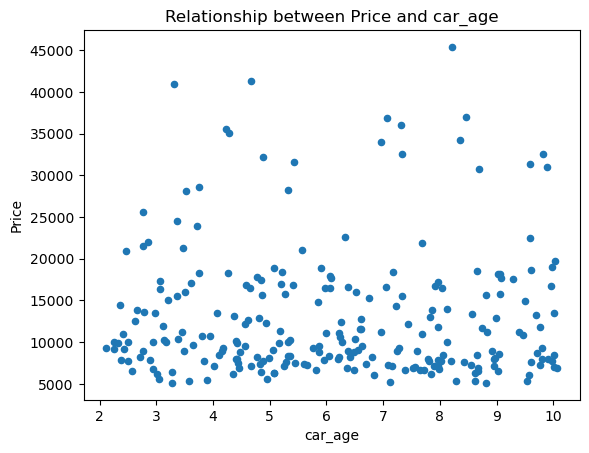

In [50]:
# Plotting scatter plots for all numerical features against Price
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'Price':
        df.plot(kind='scatter', x=column, y='Price')
        plt.title(f'Relationship between Price and {column}')
        plt.show()

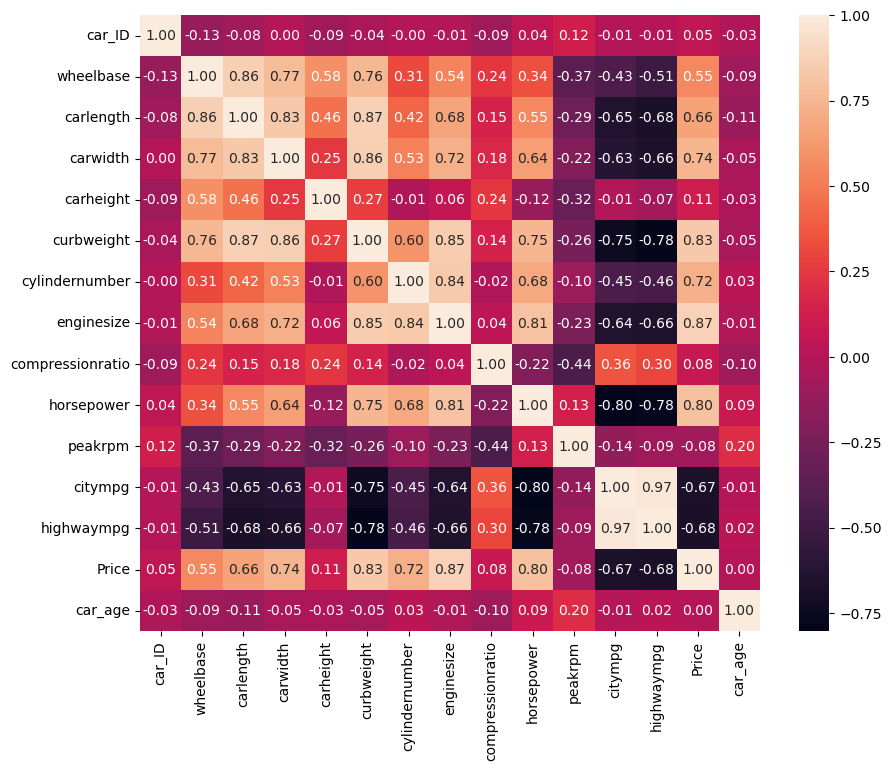

In [48]:
# Correlation Matrix for Numerical Features
# We are mostly interested in correlation with Price
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

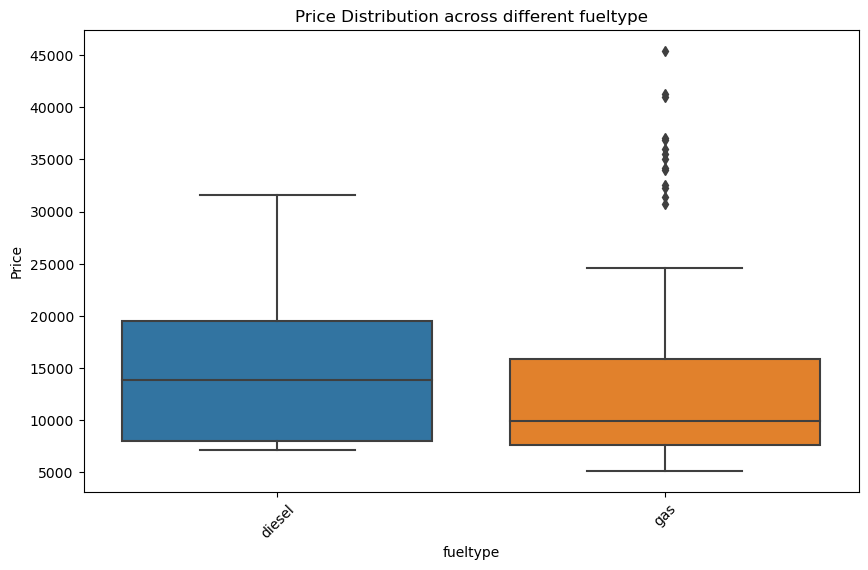

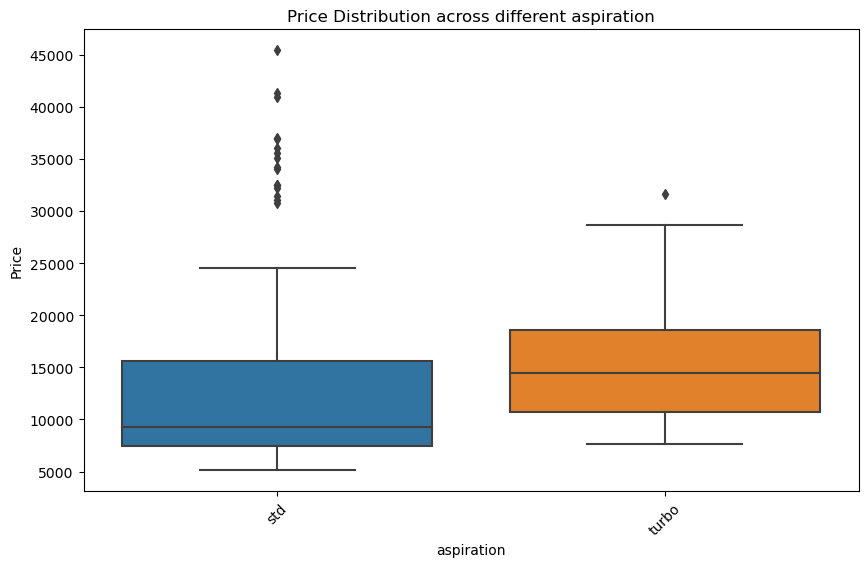

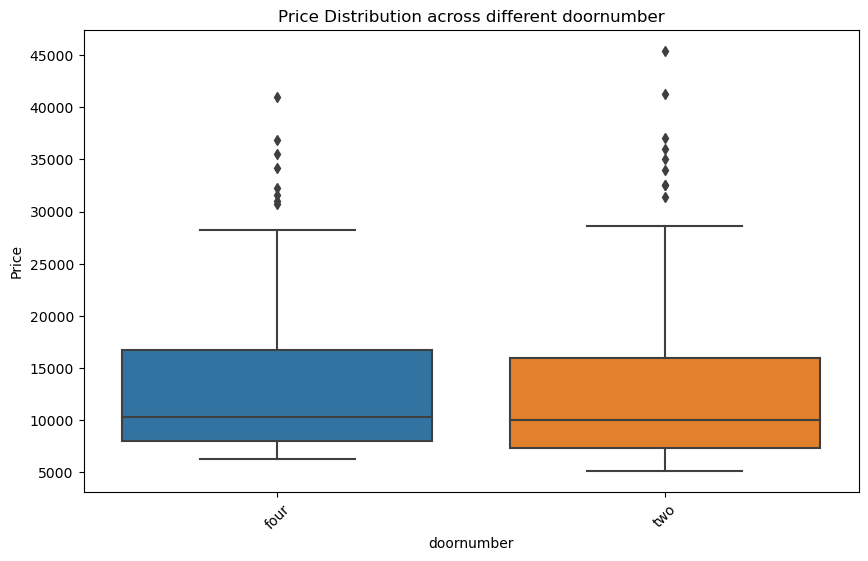

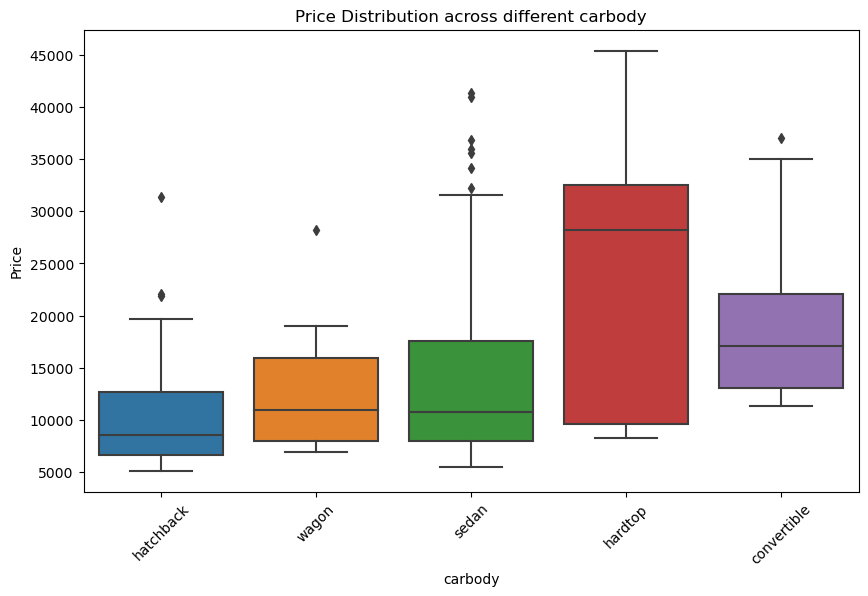

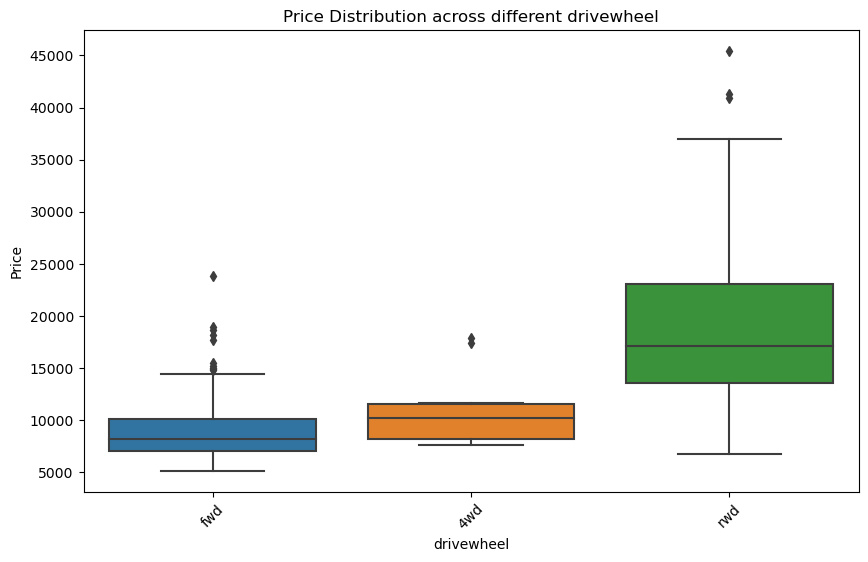

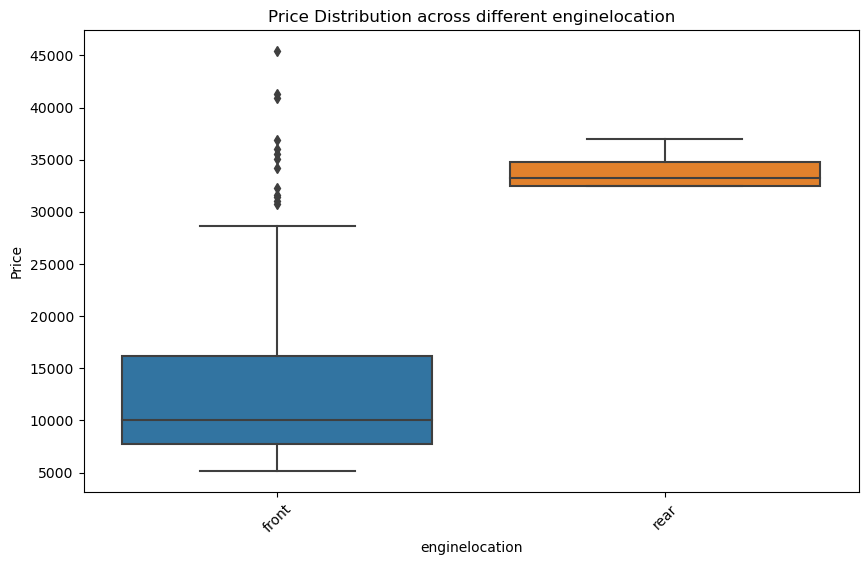

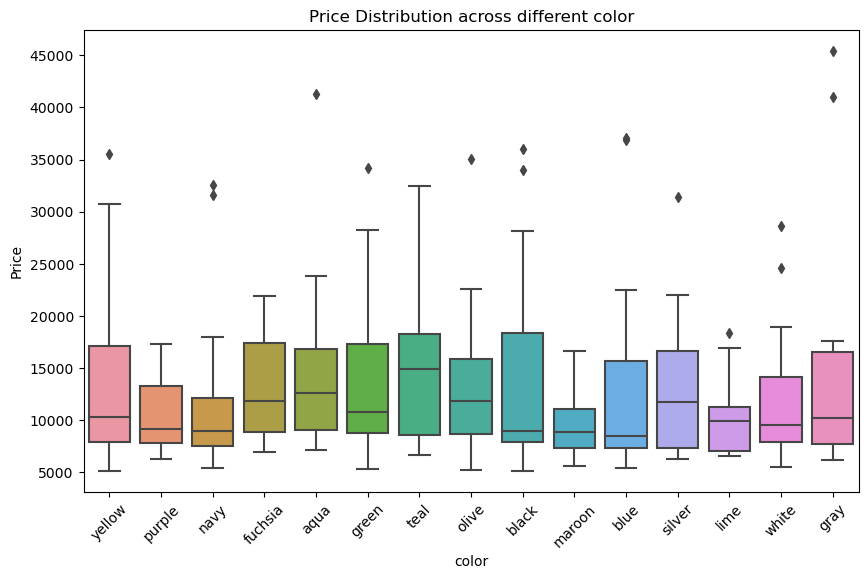

In [59]:
#Analysis for categorical features
## keeping carName but not visualizing
# dropping ownername, owneremail, dealershipaddress, iban

# Plotting boxplots for all categorical features against Price
features_to_skip = ['CarName', 'ownername', 'owneremail', 'dealershipaddress', 'iban']

for column in df.select_dtypes(include=['object']).columns:
    if column not in features_to_skip:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=column, y='Price', data=df)
        plt.title(f'Price Distribution across different {column}')
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
# Numerical features to drop: car_ID, car_age (and saledate)
## In case carheight, compresssionratio, and peakrpm can be considered to be dropped
# Categorical features to drop: ownername, owneremail, dealershipaddress, iban
## In case color and doornumber can be considered to be dropped